<a href="https://colab.research.google.com/github/imambritish/aplikasi-Fuzzy-Inference-System/blob/main/bismillahFIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PENERAPAN FUZZY INFERENCE SYSTEM METODE MAMDANI UNTUK PENERIMAAN TENAGA KERJA

**contoh kasus**

penerapan algoritma Fuzzy Inference System dengan metode MAMDANI untuk penentuan skor pelamar berdasarkan konsep fuzzy, pelamar dapat dikategorikan berdasarkan skornya kedalam kategori kurang, cukup, atau baik dilihat juga dari derajat keanggotaannya.

**variabel**

variabel input : Nilai Test Tertulis, Nilai IPK, dan pengalaman kerja

variabel output : skor seleksi pelamar

**himpunan fuzzy**

himpunan nilai test tulis : RENDAH, MENENGAH, TINGGI

himpunan nilai IPK : RENDAH, TINGGI

himpunan pengalaman kerja : SEDIKIT, BANYAK


**semesta pembicaraan**

semesta nilai test = [0.00, 100.00]

semesta nilai IPK = [0.00 4.00]

semesta pengalaman kerja (dalam bulan) = [0 +∞]

semesta skor kualifikasi pelamar : [0.00 100.00]

**domain**

domain nilai test tulis : RENDAH = [20, 45] , MENENGAH = [30 80] TINGGI = [60, 100]

domain nilai IPK : RENDAH = [0, 2.51], TINGGI = [2,4]

domain pengalaman kerja (dalam satuan bulan): SEDIKIT = [6 13], BANYAK = [8 24]

domain skor kualifikasi pelamar : KURANG = [0, 40]   CUKUP = [20 75], BAIK = [60 100] 

tenaga kerja yang menurut model fuzzy memiliki nilai z terbesar dinilai paling memenuhi kualifikasi. nilai Z dipengaruhi oleh besar nilai test tulis, nilai IPK, dan pengalaman kerja

## FUZZIFIKASI

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math 
import sympy as sy
from decimal import Decimal
from math import sqrt

KURVA UNTUK VARIABEL NILAI TEST TULIS

In [3]:
def semestaNilai():
  global bbSemestaNilai
  global baSemestaNilai
  print("Masukkkan batas bawah semesta pembicaraan dari variabel nilai test tulis : ")
  bbSemestaNilai = float(input())

  print("Masukkkan batas atas semesta pembicaraan dari variabel nilai test tulis : ")
  baSemestaNilai = float(input())

In [4]:
def semestaIPK():
  global bbSemestaIPK
  global baSemestaIPK
  print("Masukkkan batas bawah semesta pembicaraan dari variabel IPK : ")
  bbSemestaIPK = float(input())

  print("Masukkkan batas atas semesta pembicaraan dari variabel IPK : ")
  baSemestaIPK = float(input())

In [5]:
def semestaPengalamanKerja():
  global bbSemestaPengalaman
  global baSemestaPengalaman
  print("Masukkkan batas bawah semesta pembicaraan dari variabel pengalaman : ")
  bbSemestaPengalaman = float(input())

  print("Masukkkan batas atas semesta pembicaraan dari variabel pengalaman : ")
  baSemestaPengalaman = float(input())

In [6]:
def semestaKualifikasi():
  global bbSemestaKualifikasi
  global baSemestaKualifikasi
  print("Masukkkan batas bawah semesta pembicaraan dari variabel output nilai kualifikasi akhir pelamar : ")
  bbSemestaKualifikasi = float(input())

  print("Masukkkan batas atas semesta pembicaraan dari variabel output nilai kualifikasi akhir pelamar : ")
  baSemestaKualifikasi= float(input())

In [7]:
semestaNilai()

Masukkkan batas bawah semesta pembicaraan dari variabel nilai test tulis : 
0
Masukkkan batas atas semesta pembicaraan dari variabel nilai test tulis : 
100


In [8]:
semestaIPK()

Masukkkan batas bawah semesta pembicaraan dari variabel IPK : 
0
Masukkkan batas atas semesta pembicaraan dari variabel IPK : 
4


In [9]:
semestaPengalamanKerja()
#math.inf
#np.inf


Masukkkan batas bawah semesta pembicaraan dari variabel pengalaman : 
0
Masukkkan batas atas semesta pembicaraan dari variabel pengalaman : 
inf


In [11]:
semestaKualifikasi()

Masukkkan batas bawah semesta pembicaraan dari variabel output nilai kualifikasi akhir pelamar : 
0
Masukkkan batas atas semesta pembicaraan dari variabel output nilai kualifikasi akhir pelamar : 
100


In [12]:
print(baSemestaPengalaman)

inf


In [13]:
def inputNilai():
  global x_nilai

  print("Masukkan nilai test tulis dari pelamar : ")
  x_nilai = float(input())

In [14]:
inputNilai()

Masukkan nilai test tulis dari pelamar : 
76


In [15]:
def domainnilaiRendah():
  global x_nilai
  global a_nilaiRendah
  global c_nilaiRendah 
  global b_nilaiRendah
  global sbX_nilaiRendah
  global sbY_nilaiRendah

  print("Nilai test tulis dari siswa yang sudah di inputkan : {nilaiTes}".format(nilaiTes = x_nilai))

  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test RENDAH (batas bawah) : ")
  a_nilaiRendah = float(input())
  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test RENDAH (batas atas) : ")
  c_nilaiRendah = float(input())
  b_nilaiRendah = (a_nilaiRendah + c_nilaiRendah) / 2

  sbX_nilaiRendah = []
  sbY_nilaiRendah = []

  for i in np.arange(a_nilaiRendah,c_nilaiRendah + 1, 0.1):

    sbX_nilaiRendah.append(i)
    if  i < (b_nilaiRendah) and i > a_nilaiRendah:
      oordinat = 1 - 2* pow(((i - a_nilaiRendah) / (c_nilaiRendah - a_nilaiRendah)),2)
      sbY_nilaiRendah.append(oordinat)

    elif i > (b_nilaiRendah) and i < c_nilaiRendah: 
      oordinat = 2* pow(((c_nilaiRendah-i)/(c_nilaiRendah-a_nilaiRendah) ),2)
      sbY_nilaiRendah.append(oordinat)

    elif i == (b_nilaiRendah):
      oordinat = 0.5
      sbY_nilaiRendah.append(oordinat)

    elif i >= c_nilaiRendah:
      oordinat = 0
      sbY_nilaiRendah.append(oordinat)

    elif i <= a_nilaiRendah:
      oordinat = 1
      sbY_nilaiRendah.append(oordinat)
      
    i += 1

  sbX_nilaiRendah.insert(0, 0)  
  sbX_nilaiRendah.append(100)

  sbY_nilaiRendah.insert(0, 1)
  sbY_nilaiRendah.append(0)

  plt.plot(sbX_nilaiRendah,sbY_nilaiRendah, color = 'blue') 
  plt.axis([bbSemestaNilai, baSemestaNilai, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(nilaiRendah)')
  plt.suptitle('kurva Variabel nilai tes RENDAH')
  plt.show


Nilai test tulis dari siswa yang sudah di inputkan : 76.0
Domain variabel fuzzy nilai test tulis di himpunan nilai test RENDAH (batas bawah) : 
0
Domain variabel fuzzy nilai test tulis di himpunan nilai test RENDAH (batas atas) : 
45


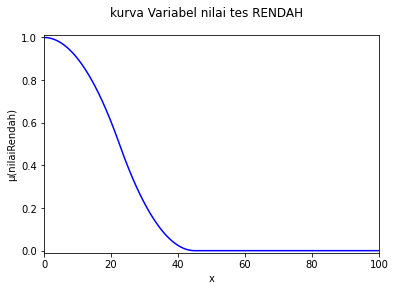

In [16]:
domainnilaiRendah()

In [17]:
def domainnilaiMenengah():
  global x_nilai
  global a_nilaiMenengah
  global c_nilaiMenengah
  global b_nilaiMenengah
  global d_nilaiMenengah
  global e_nilaiMenengah
  global sbX_nilaiMenengah
  global sbY_nilaiMenengah

  print("Nilai test tulis dari siswa yang sudah di inputkan : {nilaiTes}".format(nilaiTes = x_nilai))
  
  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test MENENGAH (batas bawah) : ")
  a_nilaiMenengah = float(input())
  
  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test MENENGAH (batas atas) :")
  b_nilaiMenengah = float(input()) 

  c_nilaiMenengah = (a_nilaiMenengah + b_nilaiMenengah) / 2
  d_nilaiMenengah = (a_nilaiMenengah + c_nilaiMenengah) / 2
  e_nilaiMenengah = (c_nilaiMenengah + b_nilaiMenengah) / 2

  sbX_nilaiMenengah = []
  sbY_nilaiMenengah = []

  for i in np.arange(a_nilaiMenengah, b_nilaiMenengah + 1, 0.1):

    sbX_nilaiMenengah.append(i)
    if  i <= (a_nilaiMenengah):
      oordinat = 0
      sbY_nilaiMenengah.append(oordinat)

    elif i < (d_nilaiMenengah) and i > a_nilaiMenengah:
      oordinat = oordinat = 2* pow(((i- a_nilaiMenengah)/(c_nilaiMenengah - a_nilaiMenengah) ),2)
      sbY_nilaiMenengah.append(oordinat)

    elif i == d_nilaiMenengah:
      oordinat = 0.5
      sbY_nilaiMenengah.append(oordinat)

    elif i < c_nilaiMenengah and i > d_nilaiMenengah:
      oordinat = 1 - 2* pow(((c_nilaiMenengah - i) / (c_nilaiMenengah - a_nilaiMenengah)),2)
      sbY_nilaiMenengah.append(oordinat)

    elif i == c_nilaiMenengah:
      oordinat = 1
      sbY_nilaiMenengah.append(oordinat)

    elif i > c_nilaiMenengah and i < e_nilaiMenengah:
      oordinat = 1 - 2* pow(((i - c_nilaiMenengah) / (b_nilaiMenengah - c_nilaiMenengah)),2)
      sbY_nilaiMenengah.append(oordinat)

    elif i == e_nilaiMenengah:
      oordinat = 0.5
      sbY_nilaiMenengah.append(oordinat)

    elif i > e_nilaiMenengah and i < b_nilaiMenengah:
      oordinat = 2* pow(((b_nilaiMenengah - i)/(b_nilaiMenengah - c_nilaiMenengah) ),2)
      sbY_nilaiMenengah.append(oordinat)

    elif i >= b_nilaiMenengah:
      oordinat =0
      sbY_nilaiMenengah.append(oordinat)

    i += 1
    
  sbX_nilaiMenengah.insert(0, 0)
  sbX_nilaiMenengah.append(100)

  sbY_nilaiMenengah.insert(0, 0)
  sbY_nilaiMenengah.append(0)
  
  plt.plot(sbX_nilaiMenengah,sbY_nilaiMenengah, color = 'green') 
  plt.axis([bbSemestaNilai, baSemestaNilai, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(nilaiMenenggah)')
  plt.suptitle('kurva Variabel nilai tes Menengah')

  plt.show


Nilai test tulis dari siswa yang sudah di inputkan : 76.0
Domain variabel fuzzy nilai test tulis di himpunan nilai test MENENGAH (batas bawah) : 
30
Domain variabel fuzzy nilai test tulis di himpunan nilai test MENENGAH (batas atas) :
90


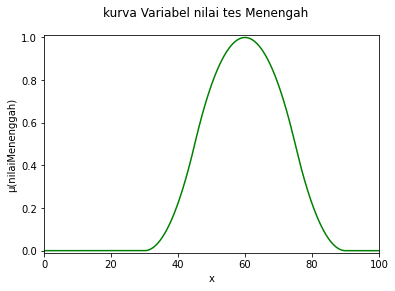

In [18]:
domainnilaiMenengah()

In [19]:
def domainnilaiTinggi():
  global x_nilai
  global a_nilaiTinggi
  global c_nilaiTinggi
  global b_nilaiTinggi
  global sbX_nilaiTinggi
  global sbY_nilaiTinggi

  print("Nilai test tulis dari siswa yang sudah di inputkan : {nilaiTes}".format(nilaiTes = x_nilai))
  
  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test TINGGI (batas bawah) : ")
  a_nilaiTinggi = float(input())
  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test TINGGI (batas atas) :")
  c_nilaiTinggi = float(input()) 
  b_nilaiTinggi = (a_nilaiTinggi + c_nilaiTinggi) / 2

  sbX_nilaiTinggi = []
  sbY_nilaiTinggi = []

  for i in np.arange(a_nilaiTinggi, c_nilaiTinggi + 1, 0.1):

    sbX_nilaiTinggi.append(i)
    if  i < (b_nilaiTinggi) and i > a_nilaiTinggi:
      oordinat = 2* pow(((i- a_nilaiTinggi)/(c_nilaiTinggi - a_nilaiTinggi) ),2)
      sbY_nilaiTinggi.append(oordinat)

    elif i > (b_nilaiTinggi) and i < c_nilaiTinggi: 
      oordinat = 1 - 2* pow(((c_nilaiTinggi - i) / (c_nilaiTinggi - a_nilaiTinggi)),2)
      sbY_nilaiTinggi.append(oordinat)

    elif i == (b_nilaiTinggi):
      oordinat = 0.5
      sbY_nilaiTinggi.append(oordinat)

    elif i <= a_nilaiTinggi:
      oordinat = 0
      sbY_nilaiTinggi.append(oordinat)

    elif i >= c_nilaiTinggi:
      oordinat = 1
      sbY_nilaiTinggi.append(oordinat)
    i += 1

  sbX_nilaiTinggi.insert(0, 0)
  sbX_nilaiTinggi.append(100)

  sbY_nilaiTinggi.insert(0, 0)
  sbY_nilaiTinggi.append(1)
  
  plt.plot(sbX_nilaiTinggi,sbY_nilaiTinggi, color = 'red') 
  plt.axis([bbSemestaNilai, baSemestaNilai, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(nilaiTinggi)')
  plt.suptitle('kurva Variabel nilai tes TINGGI')
  plt.show


Nilai test tulis dari siswa yang sudah di inputkan : 76.0
Domain variabel fuzzy nilai test tulis di himpunan nilai test TINGGI (batas bawah) : 
60
Domain variabel fuzzy nilai test tulis di himpunan nilai test TINGGI (batas atas) :
100


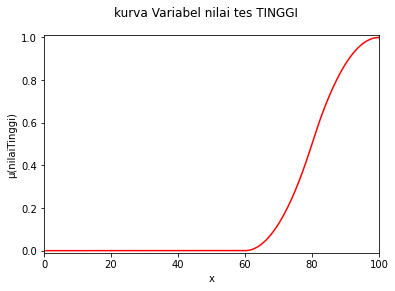

In [20]:
domainnilaiTinggi()

Langkah selanjutnya menentukan derajat keanggotaan untuk variabel nilai tes atau nilai tes tulis yang didapat siswa calon penerima beasiswa. 

In [21]:
def μNilaiRENDAH():
  global μNilaiRENDAH 

  if x_nilai >= (c_nilaiRendah):
    μNilaiRENDAH = 0

  elif  x_nilai < (b_nilaiRendah) and x_nilai > (a_nilaiRendah):
    μNilaiRENDAH = 1 - 2* pow(((x_nilai - a_nilaiRendah) / (c_nilaiRendah - a_nilaiRendah)),2)
    
  elif x_nilai > (b_nilaiRendah) and x_nilai < (c_nilaiRendah): 
    μNilaiRENDAH = 2* pow(((c_nilaiRendah-x_nilai)/(c_nilaiRendah-a_nilaiRendah) ),2)
    
  elif x_nilai == (b_nilaiRendah):
    μNilaiRENDAH = 0.5

  elif x_nilai <= (a_nilaiRendah):
    μNilaiRENDAH = 1

  print("Untuk nilai tes tulis sebesar {nilaiTes} nilai μNilaiRENDAH adalah : {derajatNilaiRendah}" 
        .format(nilaiTes = x_nilai, derajatNilaiRendah = μNilaiRENDAH))


  plt.plot(sbX_nilaiRendah,sbY_nilaiRendah, color = 'blue') 
  plt.plot(sbX_nilaiMenengah,sbY_nilaiMenengah, color = 'green') 
  plt.plot(sbX_nilaiTinggi,sbY_nilaiTinggi, color = 'red') 
  plt.plot([0,x_nilai,x_nilai],[μNilaiRENDAH,μNilaiRENDAH,0], 'k--') 
  
  plt.plot([x_nilai], [μNilaiRENDAH], 'ko')
  plt.axis([bbSemestaNilai, baSemestaNilai, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(nilaiRendah)')
  plt.suptitle('derajat keanggotaan variabel Nilai tes Himpunan RENDAH')
  
  plt.show

Untuk nilai tes tulis sebesar 76.0 nilai μNilaiRENDAH adalah : 0


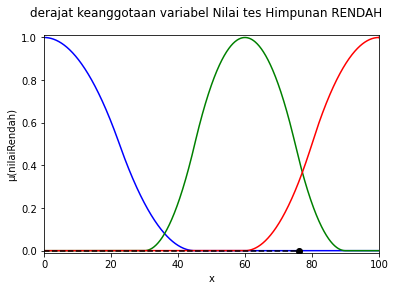

In [22]:
μNilaiRENDAH()

In [23]:
def μNilaiMENENGAH():
  global μNilaiMENENGAH

  if  x_nilai <= (a_nilaiMenengah):
    μNilaiMENENGAH = 0

  elif x_nilai < (d_nilaiMenengah) and x_nilai > a_nilaiMenengah:
    μNilaiMENENGAH = oordinat = 2* pow(((x_nilai- a_nilaiMenengah)/(c_nilaiMenengah - a_nilaiMenengah) ),2)

  elif x_nilai == d_nilaiMenengah:
    μNilaiMENENGAH = 0.5

  elif x_nilai < c_nilaiMenengah and x_nilai > d_nilaiMenengah:
    μNilaiMENENGAH = 1 - 2* pow(((c_nilaiMenengah - x_nilai) / (c_nilaiMenengah - a_nilaiMenengah)),2)

  elif x_nilai == c_nilaiMenengah:
    μNilaiMENENGAH = 1

  elif x_nilai > c_nilaiMenengah and x_nilai < e_nilaiMenengah:
    μNilaiMENENGAH = 1 - 2* pow(((x_nilai - c_nilaiMenengah) / (b_nilaiMenengah - c_nilaiMenengah)),2)

  elif x_nilai == e_nilaiMenengah:
    μNilaiMENENGAH = 0.5
    
  elif x_nilai > e_nilaiMenengah and x_nilai < b_nilaiMenengah:
    μNilaiMENENGAH = 2* pow(((b_nilaiMenengah - x_nilai)/(b_nilaiMenengah - c_nilaiMenengah) ),2)
    
  elif x_nilai >= b_nilaiMenengah:
    μNilaiMENENGAH =0
  
  print("Untuk nilai tes tulis sebesar {nilaiTes} nilai μNilaiMENENGAH adalah : {derajatNilaiMenengah}" 
        .format(nilaiTes = x_nilai, derajatNilaiMenengah = μNilaiMENENGAH))
   
  print("Untuk nilai tes tulis sebesar {nilaiTes} nilai μNilaiRENDAH adalah : {derajatNilaiRendah}" 
        .format(nilaiTes = x_nilai, derajatNilaiRendah = μNilaiRENDAH))


  plt.plot(sbX_nilaiRendah,sbY_nilaiRendah, color = 'blue') 
  plt.plot(sbX_nilaiMenengah,sbY_nilaiMenengah, color = 'green') 
  plt.plot(sbX_nilaiTinggi,sbY_nilaiTinggi, color = 'red') 
  plt.plot([0,x_nilai,x_nilai],[μNilaiRENDAH,μNilaiRENDAH,0], 'k--') 
  plt.plot([0,x_nilai,x_nilai],[μNilaiMENENGAH,μNilaiMENENGAH,0], 'k--') 
  
  plt.plot([x_nilai], [μNilaiRENDAH], 'ko')
  plt.plot([x_nilai], [μNilaiMENENGAH], 'ko')

  plt.axis([bbSemestaNilai, baSemestaNilai, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(nilaiRendah)')
  plt.suptitle('derajat keanggotaan variabel Nilai tes Himpunan RENDAH')
  

  plt.show

Untuk nilai tes tulis sebesar 76.0 nilai μNilaiMENENGAH adalah : 0.4355555555555556
Untuk nilai tes tulis sebesar 76.0 nilai μNilaiRENDAH adalah : 0


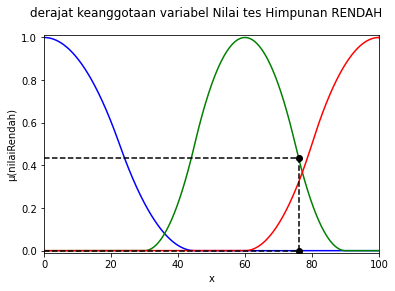

In [24]:
μNilaiMENENGAH()

In [25]:
def μNilaiTINGGI():
  global μNilaiTINGGI
  
  if x_nilai <= (a_nilaiTinggi):
    μNilaiTINGGI = 0

  elif  x_nilai < (b_nilaiTinggi) and x_nilai > (a_nilaiTinggi):
    μNilaiTINGGI = 2* pow(((x_nilai- a_nilaiTinggi)/(c_nilaiTinggi - a_nilaiTinggi) ),2)
    

  elif x_nilai > (b_nilaiTinggi) and x_nilai < (c_nilaiTinggi): 
    μNilaiTINGGI = 1 - 2* pow(((c_nilaiTinggi - x_nilai) / (c_nilaiTinggi - a_nilaiTinggi)),2)
    

  elif x_nilai == (b_nilaiTinggi):
    μNilaiTINGGI = 0.5

  elif x_nilai >= (c_nilaiTinggi):
    μNilaiTINGGI = 1
    
  print("Untuk nilai tes tulis sebesar {nilaiTest} nilai μNilaiTINGGI adalah : {derajatNilaiTINGGI}" 
        .format(nilaiTest = x_nilai, derajatNilaiTINGGI = μNilaiTINGGI))
  
  print("Untuk nilai tes tulis sebesar {nilaiTes} nilai μNilaiRENDAH adalah : {derajatNilaiRendah}" 
        .format(nilaiTes = x_nilai, derajatNilaiRendah = μNilaiRENDAH))
  
  print("Untuk nilai tes tulis sebesar {nilaiTes} nilai μNilaiMENENGAH adalah : {derajatNilaiMenengah}" 
        .format(nilaiTes = x_nilai, derajatNilaiMenengah = μNilaiMENENGAH))


  plt.plot(sbX_nilaiRendah,sbY_nilaiRendah, color = 'blue') 
  plt.plot(sbX_nilaiMenengah,sbY_nilaiMenengah, color = 'green') 
  plt.plot(sbX_nilaiTinggi,sbY_nilaiTinggi, color = 'red') 
  
  plt.plot([0,x_nilai,x_nilai],[μNilaiRENDAH,μNilaiRENDAH,0], 'k--') 
  plt.plot([0,x_nilai,x_nilai],[μNilaiMENENGAH,μNilaiMENENGAH,0], 'k--')   
  plt.plot([0,x_nilai,x_nilai],[μNilaiTINGGI,μNilaiTINGGI,0], 'k--') 

  plt.plot([x_nilai], [μNilaiRENDAH], 'ko')
  plt.plot([x_nilai], [μNilaiMENENGAH], 'ko')
  plt.plot([x_nilai], [μNilaiTINGGI], 'ko')
  plt.axis([bbSemestaNilai, baSemestaNilai, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(nilaiTinggi)')
  plt.suptitle('derajat keanggotaan variabel Nilai tes himpunan TINGGI')
  

  plt.show

Untuk nilai tes tulis sebesar 76.0 nilai μNilaiTINGGI adalah : 0.32000000000000006
Untuk nilai tes tulis sebesar 76.0 nilai μNilaiRENDAH adalah : 0
Untuk nilai tes tulis sebesar 76.0 nilai μNilaiMENENGAH adalah : 0.4355555555555556


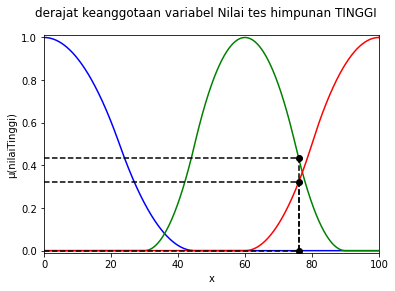

In [26]:
μNilaiTINGGI()

KURVA UNTUK VARIABEL IPK

In [27]:
def Ipk():
  global x_ipk
  print("Masukkan IPK dari pelamar : ")
  x_ipk = float(input())

In [28]:
Ipk()

Masukkan IPK dari pelamar : 
2.10000


In [29]:
def domainipkRendah():
  global x_ipk
  global a_ipkRendah
  global c_ipkRendah
  global b_ipkRendah
  global sbX_ipkRendah
  global sbY_ipkRendah

  print("Nilai IPK dari pelamar yang sudah di inputkan : {ipk}".format(ipk = x_ipk))
  
  print("Domain variabel fuzzy IPK di himpunan RENDAH (batas bawah) : ")
  a_ipkRendah = float(input())
  print("Domain variabel fuzzy IPK di himpunan RENDAH (batas bawah) : ")
  c_ipkRendah = float(input()) 
  b_ipkRendah = (a_ipkRendah + c_ipkRendah) / 2

  sbX_ipkRendah = []
  sbY_ipkRendah = []

  for i in np.arange(a_ipkRendah,c_ipkRendah + 1, 0.1):

    sbX_ipkRendah.append(i)
    if  i < (b_ipkRendah) and i > a_ipkRendah:
      oordinat = 1 - 2* pow(((i - a_ipkRendah) / (c_ipkRendah - a_ipkRendah)),2)
      sbY_ipkRendah.append(oordinat)

    elif i > (b_ipkRendah) and i < c_ipkRendah: 
      oordinat = 2* pow(((c_ipkRendah-i)/(c_ipkRendah-a_ipkRendah) ),2)
      sbY_ipkRendah.append(oordinat)

    elif i == (b_ipkRendah):
      oordinat = 0.5
      sbY_ipkRendah.append(oordinat)

    elif i >= c_ipkRendah:
      oordinat = 0
      sbY_ipkRendah.append(oordinat)

    elif i <= a_ipkRendah:
      oordinat = 1
      sbY_ipkRendah.append(oordinat)
      
    i += 1


  sbX_ipkRendah.insert(0, 0)
  sbX_ipkRendah.append(c_ipkRendah +4)

  sbY_ipkRendah.insert(0, 1)
  sbY_ipkRendah.append(0)

  plt.plot(sbX_ipkRendah,sbY_ipkRendah, color = 'blue') 
  plt.axis([bbSemestaIPK, baSemestaIPK , -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(ipkRendah)')
  plt.suptitle('kurva Variabel IPK rendah')
  plt.show


Nilai IPK dari pelamar yang sudah di inputkan : 2.1
Domain variabel fuzzy IPK di himpunan RENDAH (batas bawah) : 
0
Domain variabel fuzzy IPK di himpunan RENDAH (batas bawah) : 
3


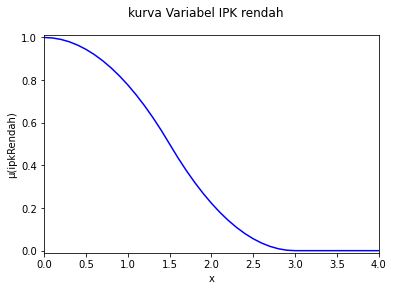

In [32]:
domainipkRendah()

In [33]:
def domainipkTinggi():
  global x_ipk
  global a_ipkTinggi
  global c_ipkTinggi
  global b_ipkTinggi
  global sbX_ipkTinggi
  global sbY_ipkTinggi

  print("Nilai IPK dari pelamar yang sudah di inputkan : {ipk}".format(ipk = x_ipk))
  
  print("Domain variabel fuzzy IPK di himpunan IPK TINGGI (batas bawah) : ")
  a_ipkTinggi = float(input())
  print("Domain variabel fuzzy IPK di himpunan IPK TINGGI (batas atas) :")
  c_ipkTinggi = float(input()) 
  b_ipkTinggi = (a_ipkTinggi + c_ipkTinggi) / 2

  sbX_ipkTinggi = []
  sbY_ipkTinggi = []

  for i in np.arange(a_ipkTinggi, c_ipkTinggi + 1, 0.1):

    sbX_ipkTinggi.append(i)
    if  i < (b_ipkTinggi) and i > a_ipkTinggi:
      oordinat = 2* pow(((i- a_ipkTinggi)/(c_ipkTinggi - a_ipkTinggi) ),2)
      sbY_ipkTinggi.append(oordinat)

    elif i > (b_ipkTinggi) and i < c_ipkTinggi: 
      oordinat = 1 - 2* pow(((c_ipkTinggi - i) / (c_ipkTinggi - a_ipkTinggi)),2)
      sbY_ipkTinggi.append(oordinat)

    elif i == (b_ipkTinggi):
      oordinat = 0.5
      sbY_ipkTinggi.append(oordinat)

    elif i <= a_ipkTinggi:
      oordinat = 0
      sbY_ipkTinggi.append(oordinat)

    elif i >= c_ipkTinggi:
      oordinat = 1
      sbY_ipkTinggi.append(oordinat)
    i += 1

  sbX_ipkTinggi.insert(0, 0)
  sbX_ipkTinggi.append(4)

  sbY_ipkTinggi.insert(0, 0)
  sbY_ipkTinggi.append(1)
  
  plt.plot(sbX_ipkTinggi,sbY_ipkTinggi, color = 'red') 
  plt.axis([bbSemestaIPK, baSemestaIPK, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(ipkTinggi)')
  plt.suptitle('kurva Variabel IPK TINGGI')
  plt.show


Nilai IPK dari pelamar yang sudah di inputkan : 2.1
Domain variabel fuzzy IPK di himpunan IPK TINGGI (batas bawah) : 
1
Domain variabel fuzzy IPK di himpunan IPK TINGGI (batas atas) :
4


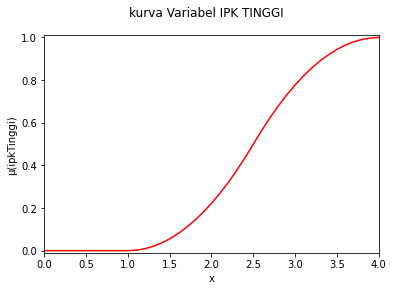

In [34]:
domainipkTinggi ()

Langkah selanjutnya menentukan derajat keanggotaan untuk variabel data rekening listrik sebulan terakhir calon penerima beasiswa. 

In [35]:
def μIpkRENDAH():
  global μipkRendah

  if x_ipk < (b_ipkRendah) and x_ipk > a_ipkRendah:
    μipkRendah = 1 - 2* pow(((x_ipk - a_ipkRendah) / (c_ipkRendah - a_ipkRendah)),2)     

  elif x_ipk > (b_ipkRendah) and x_ipk < c_ipkRendah: 
    μipkRendah = 2* pow(((c_ipkRendah-x_ipk)/(c_ipkRendah-a_ipkRendah) ),2)
    
  elif x_ipk == (b_ipkRendah):
    μipkRendah = 0.5 

  elif x_ipk >= c_ipkRendah:
    μipkRendah = 0

  elif x_ipk <= a_ipkRendah:
    μipkRendah = 1
  
    
  print("Untuk nilai IPK pelamar {ipk} nilai μipkRendah adalah : {derajatipkRendah}" 
        .format(ipk = x_ipk, derajatipkRendah = μipkRendah))


  plt.plot(sbX_ipkRendah,sbY_ipkRendah, color = 'blue') 
  plt.plot(sbX_ipkTinggi,sbY_ipkTinggi, color = 'red') 
  plt.plot([0,x_ipk,x_ipk],[μipkRendah,μipkRendah,0], 'k--') 
  
  plt.plot([x_ipk], [μipkRendah], 'go')
  plt.axis([bbSemestaIPK, baSemestaIPK, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(ipkRendah)')
  plt.suptitle('derajat keanggotaan variabel penggunaan listrik Himpunan IRIT')
  

  plt.show

Untuk nilai IPK pelamar 2.1 nilai μipkRendah adalah : 0.18


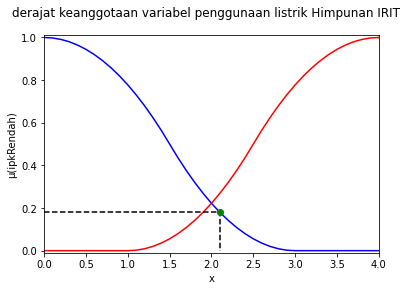

In [36]:
μIpkRENDAH()

In [37]:
def μipkTINGGI():

  global μipkTinggi

  if  x_ipk < (b_ipkTinggi) and x_ipk > a_ipkTinggi:
    μipkTinggi = 2* pow(((x_ipk- a_ipkTinggi)/(c_ipkTinggi - a_ipkTinggi) ),2)

  elif x_ipk > (b_ipkTinggi) and x_ipk < c_ipkTinggi: 
    μipkTinggi = 1 - 2* pow(((c_ipkTinggi - x_ipk) / (c_ipkTinggi- a_ipkTinggi)),2)

  elif x_ipk == (b_ipkTinggi):
    μipkTinggi = 0.5

  elif x_ipk <= a_ipkTinggi:
    μipkTinggi = 0

  elif x_ipk >= c_ipkTinggi:
    μipkTinggi = 1
     

  print("Untuk IPK pelamar {ipk} nilai μipkTinggi adalah : {derajatipkTinggi}" 
        .format(ipk = x_ipk, derajatipkTinggi = μipkTinggi))
  
  print("Untuk IPK pelamar {ipk} nilai μipkRendah adalah : {derajatipkRendah}" 
        .format(ipk = x_ipk, derajatipkRendah = μipkRendah))


  plt.plot(sbX_ipkRendah,sbY_ipkRendah, color = 'blue') 
  plt.plot(sbX_ipkTinggi,sbY_ipkTinggi, color = 'red') 
  plt.plot([0,x_ipk,x_ipk],[μipkRendah,μipkRendah,0], 'g--')
  plt.plot([0,x_ipk,x_ipk],[μipkTinggi,μipkTinggi,0], 'g--') 
  plt.plot([x_ipk], [μipkRendah], 'go')
  plt.plot([x_ipk], [μipkTinggi], 'go')
  plt.axis([bbSemestaIPK, baSemestaIPK, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(ipkTinggi)')
  plt.suptitle('derajat keanggotaan variabel IPK himpunan tinggi')
  

  plt.show

Untuk IPK pelamar 2.1 nilai μipkTinggi adalah : 0.26888888888888896
Untuk IPK pelamar 2.1 nilai μipkRendah adalah : 0.18


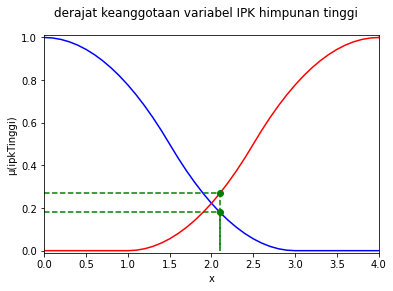

In [38]:
μipkTINGGI()

KURVA UNTUK VARIABEL PENGALAMAN KERJA

In [39]:
def pengalamanKerja():
  global x_pengalaman
  print("Berapa pengalaman kerja pelamar dalam bulan : ")
  x_pengalaman = float(input())

In [40]:
pengalamanKerja()

Berapa pengalaman kerja pelamar dalam bulan : 
12


In [41]:
def domainpengalamanSedikit():
  global x_pengalaman
  global a_pengalamanSedikit
  global b_pengalamanSedikit
  global sbX_pengalamanSedikit
  global sbY_pengalamanSedikit

  print("Pengalaman kerja pelamar yang sudah di inputkan (dalam bulan) : {bulan}".format(bulan = x_pengalaman))

  print("Domain variabel fuzzy pengalaman kerja di himpunan pengalaman SEDIKIT (batas bawah) : ")
  a_pengalamanSedikit = float(input())
  print("Domain variabel fuzzy pengalaman kerja di himpunan pengalaman SEDIKIT (batas atas) : ")
  b_pengalamanSedikit = float(input()) 
  

  sbX_pengalamanSedikit = []
  sbY_pengalamanSedikit = []

  for i in np.arange(a_pengalamanSedikit, b_pengalamanSedikit + 1, 0.01):

    sbX_pengalamanSedikit.append(i)
    if  i <= (b_pengalamanSedikit) and i >= a_pengalamanSedikit:
      oordinat = ((b_pengalamanSedikit - i) / (b_pengalamanSedikit - a_pengalamanSedikit))
      sbY_pengalamanSedikit.append(oordinat)

    elif i >= b_pengalamanSedikit:
      oordinat = 0
      sbY_pengalamanSedikit.append(oordinat)

    elif i <= a_pengalamanSedikit:
      oordinat = 1
      sbY_pengalamanSedikit.append(oordinat)

    i += 1


  sbX_pengalamanSedikit.insert(0, 0)
  sbX_pengalamanSedikit.append(b_pengalamanSedikit + 100 )

  sbY_pengalamanSedikit.insert(0, 1)
  sbY_pengalamanSedikit.append(0)

  plt.plot(sbX_pengalamanSedikit,sbY_pengalamanSedikit, color = 'blue') 
  plt.axis([bbSemestaPengalaman, 30, -0.01 ,1.01])
  plt.xlabel('x  (x dalam bulan)')
  plt.ylabel('μ(pengalamanSedikit)')
  plt.suptitle('kurva Variabel pengalaman dalam himpunan SEDIKIT : ')
  plt.show


Pengalaman kerja pelamar yang sudah di inputkan (dalam bulan) : 12.0
Domain variabel fuzzy pengalaman kerja di himpunan pengalaman SEDIKIT (batas bawah) : 
0
Domain variabel fuzzy pengalaman kerja di himpunan pengalaman SEDIKIT (batas atas) : 
13


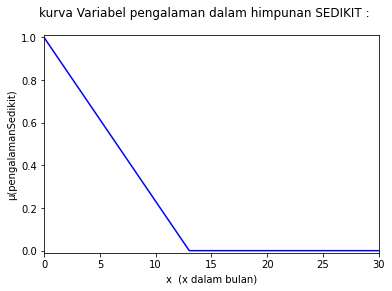

In [42]:
domainpengalamanSedikit()

In [43]:
def domainPengalamanBanyak():
  global x_pengalaman
  global a_pengalamanBanyak
  global b_pengalamanBanyak
  global sbX_pengalamanBanyak
  global sbY_pengalamanBanyak

  print("Pengalaman kerja pelamar yang sudah di inputkan (dalam bulan) : {bln}".format(bln = x_pengalaman))

  print("Domain variabel fuzzy pengalaman kerja di himpunan pengalaman BANYAK (batas bawah) :")
  a_pengalamanBanyak = float(input())
  print("Domain variabel fuzzy pengalaman kerja di himpunan pengalaman BANYAK (batas bawah) : ")
  b_pengalamanBanyak = float(input()) 
  

  sbX_pengalamanBanyak = []
  sbY_pengalamanBanyak= []

  for i in np.arange(a_pengalamanBanyak, b_pengalamanBanyak + 1, 0.01):

    sbX_pengalamanBanyak.append(i)
    if  i <= (b_pengalamanBanyak) and i >= a_pengalamanBanyak:
      oordinat = (( i- a_pengalamanBanyak) / (b_pengalamanBanyak - a_pengalamanBanyak))
      sbY_pengalamanBanyak.append(oordinat)

    elif i >= b_pengalamanBanyak:
      oordinat = 1
      sbY_pengalamanBanyak.append(oordinat)

    elif i <= a_pengalamanBanyak:
      oordinat = 0
      sbY_pengalamanBanyak.append(oordinat)

    i += 1


  sbX_pengalamanBanyak.insert(0, 0)
  sbX_pengalamanBanyak.append(b_pengalamanBanyak + 11 )

  sbY_pengalamanBanyak.insert(0, 0)
  sbY_pengalamanBanyak.append(1)

  plt.plot(sbX_pengalamanBanyak,sbY_pengalamanBanyak, color = 'red') 
  plt.axis([bbSemestaPengalaman, 30, -0.01 ,1.01])
  plt.xlabel('x  (x dalam bulan)')
  plt.ylabel('μ(pengalamanBanyak)')
  plt.suptitle('kurva Variabel pengalaman kerja himpunan BANYAK :')
  plt.show


Pengalaman kerja pelamar yang sudah di inputkan (dalam bulan) : 12.0
Domain variabel fuzzy pengalaman kerja di himpunan pengalaman BANYAK (batas bawah) :
8
Domain variabel fuzzy pengalaman kerja di himpunan pengalaman BANYAK (batas bawah) : 
24


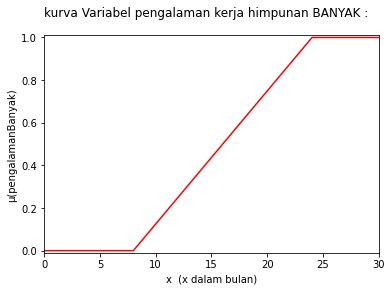

In [44]:
domainPengalamanBanyak()

Langkah selanjutnya menentukan derajat keanggotaan untuk variabel pengalaman kerja pelamar 

In [45]:
def μpengalamanSEDIKIT():
  global μpengalamanSedikit

  if x_pengalaman <= (b_pengalamanSedikit) and x_pengalaman >= a_pengalamanSedikit:
    μpengalamanSedikit =  ((b_pengalamanSedikit - x_pengalaman) / (b_pengalamanSedikit - a_pengalamanSedikit))

  elif x_pengalaman >= b_pengalamanSedikit:
    μpengalamanSedikit = 0

  elif x_pengalaman <= a_pengalamanSedikit:
    μpengalamanSedikit = 1
  
    
  print("Untuk pengalaman kerja pelamar selama {bln} bulan nilai μpengalamanSedikit adalah : {pengalamanSedikit}" 
        .format(bln = x_pengalaman, pengalamanSedikit = μpengalamanSedikit))


  plt.plot(sbX_pengalamanSedikit,sbY_pengalamanSedikit, color = 'blue') 
  plt.plot(sbX_pengalamanBanyak,sbY_pengalamanBanyak, color = 'red') 
  plt.plot([0,x_pengalaman,x_pengalaman],[μpengalamanSedikit,μpengalamanSedikit,0], 'g--') 
  
  plt.plot([x_pengalaman], [μpengalamanSedikit], 'go')
  plt.axis([bbSemestaPengalaman, 30, -0.01 ,1.01])
  plt.xlabel('x dalam satuan bulan')
  plt.ylabel('μ(pengalamanSedikit)')
  plt.suptitle('derajat keanggotaan variabel pengalaman himpunan SEDIKIT :')
  
  plt.show

Untuk pengalaman kerja pelamar selama 12.0 bulan nilai μpengalamanSedikit adalah : 0.07692307692307693


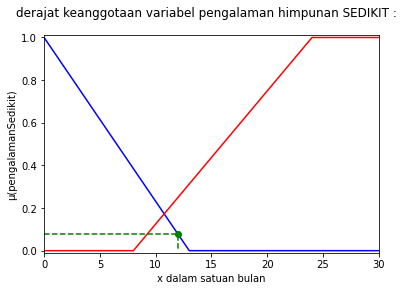

In [46]:
μpengalamanSEDIKIT()

In [47]:
def μPengalamanBANYAK():
  global μpengalamanBanyak

  if x_pengalaman <= (b_pengalamanBanyak) and x_pengalaman >= a_pengalamanBanyak:
    μpengalamanBanyak = ((x_pengalaman - a_pengalamanBanyak) / (b_pengalamanBanyak - a_pengalamanBanyak))

  elif x_pengalaman >= b_pengalamanBanyak:
    μpengalamanBanyak = 1

  elif x_pengalaman <= a_pengalamanBanyak:
    μpengalamanBanyak = 0
  
  print("Untuk pengalaman kerja pelamar selama {bln} bulan nilai μpengalamanBanyak adalah : {pengalamanBanyak}" 
        .format(bln = x_pengalaman, pengalamanBanyak = μpengalamanBanyak))
  
  print("Untuk pengalaman kerja pelamar selama {bln} bulan nilai μpengalamanSedikit adalah : {pengalamanSedikit}" 
        .format(bln = x_pengalaman, pengalamanSedikit = μpengalamanSedikit))



  plt.plot(sbX_pengalamanSedikit,sbY_pengalamanSedikit, color = 'blue') 
  plt.plot(sbX_pengalamanBanyak,sbY_pengalamanBanyak, color = 'red') 
  plt.plot([0,x_pengalaman,x_pengalaman],[μpengalamanSedikit,μpengalamanSedikit,0], 'g--') 
  plt.plot([0,x_pengalaman,x_pengalaman],[μpengalamanBanyak,μpengalamanBanyak,0], 'g--') 
  
  plt.plot([x_pengalaman], [μpengalamanSedikit], 'go')
  plt.plot([x_pengalaman], [μpengalamanBanyak], 'go')
  plt.axis([bbSemestaPengalaman, 30, -0.01 ,1.01])
  plt.xlabel('x dalam satuan bulan')
  plt.ylabel('μ(pengalamanBanyak)')
  plt.suptitle('derajat keanggotaan variabel pengalaman banyak :')
  
  plt.show

Untuk pengalaman kerja pelamar selama 12.0 bulan nilai μpengalamanBanyak adalah : 0.25
Untuk pengalaman kerja pelamar selama 12.0 bulan nilai μpengalamanSedikit adalah : 0.07692307692307693


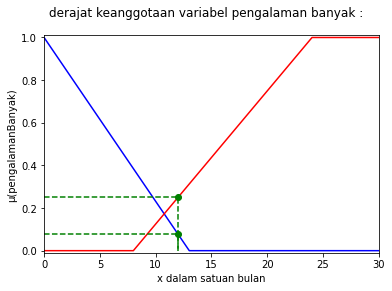

In [48]:
μPengalamanBANYAK()

Menentukan domain untuk variabel output besaran skor kualifikasi pelamar dalam himpunan skor kualifikasi kurang, cukup, dan baik.

Menentukan kurva tiap tiap himpunan dari variabel output

Menentukan rumus fungsi keanggotaan tiap tiap himpunan variabel output

In [118]:
def domainkualifikasiKurang():
  global x_kualifikasi
  global a_kualifikasiKurang
  global c_kualifikasiKurang
  global b_kualifikasiKurang
  global sbX_kualifikasiKurang
  global sbY_kualifikasiKurang

  
  print("Domain variabel fuzzy besaran kualifikasi Perlamar di himpunan KURANG (batas bawah) : ")
  a_kualifikasiKurang = float(input())
  print("Domain variabel fuzzy besaran kualifikasi Perlamar di himpunan KURANG (batas atas) : ")
  c_kualifikasiKurang = float(input())
  b_kualifikasiKurang = (a_kualifikasiKurang + c_kualifikasiKurang) / 2

  sbX_kualifikasiKurang = []
  sbY_kualifikasiKurang = []

  for i in np.arange(a_kualifikasiKurang,c_kualifikasiKurang + 1, 0.1):

    sbX_kualifikasiKurang.append(i)
    if  i < (b_kualifikasiKurang) and i > a_kualifikasiKurang:
      oordinat = 1 - 2* pow(((i - a_kualifikasiKurang) / (c_kualifikasiKurang - a_kualifikasiKurang)),2)
      sbY_kualifikasiKurang.append(oordinat)

    elif i > (b_kualifikasiKurang) and i < c_kualifikasiKurang: 
      oordinat = 2* pow(((c_kualifikasiKurang-i)/(c_kualifikasiKurang -a_kualifikasiKurang) ),2)
      sbY_kualifikasiKurang.append(oordinat)

    elif i == (b_kualifikasiKurang):
      oordinat = 0.5
      sbY_kualifikasiKurang.append(oordinat)

    elif i >= c_kualifikasiKurang:
      oordinat = 0
      sbY_kualifikasiKurang.append(oordinat)

    elif i <= a_kualifikasiKurang:
      oordinat = 1
      sbY_kualifikasiKurang.append(oordinat)
    i += 1

  sbX_kualifikasiKurang.insert(0, 0)  
  sbX_kualifikasiKurang.append(100)

  sbY_kualifikasiKurang.insert(0, 1)
  sbY_kualifikasiKurang.append(0)

  plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(kualifikasiKurang)')
  plt.suptitle('kurva Variabel kualifikasi besaran KURANG')
  plt.show


Domain variabel fuzzy besaran kualifikasi Perlamar di himpunan KURANG (batas bawah) : 
0
Domain variabel fuzzy besaran kualifikasi Perlamar di himpunan KURANG (batas atas) : 
50


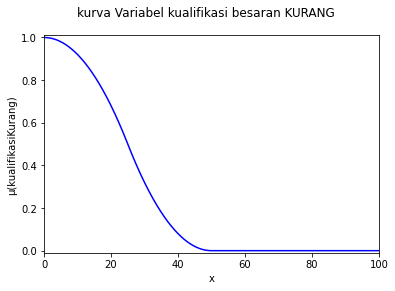

In [119]:
domainkualifikasiKurang()

In [120]:
def domainkualifikasiCukup():
  global x_kualifikasi
  global a_kualifikasiCukup
  global c_kualifikasiCukup
  global b_kualifikasiCukup
  global d_kualifikasiCukup
  global e_kualifikasiCukup
  global sbX_kualifikasiCukup
  global sbY_kualifikasiCukup


  print("Domain variabel fuzzy besaran kualifikasi Perlamar di himpunan CUKUP (batas bawah) : ")
  a_kualifikasiCukup = float(input())
  
  print("Domain variabel fuzzy besaran kualifikasi Perlamar di himpunan CUKUP (batas bawah) : ")
  b_kualifikasiCukup = float(input()) 

  c_kualifikasiCukup = (a_kualifikasiCukup + b_kualifikasiCukup) / 2
  d_kualifikasiCukup = (a_kualifikasiCukup + c_kualifikasiCukup) / 2
  e_kualifikasiCukup = (c_kualifikasiCukup + b_kualifikasiCukup) / 2

  sbX_kualifikasiCukup = []
  sbY_kualifikasiCukup = []

  for i in np.arange(a_kualifikasiCukup, b_kualifikasiCukup + 1, 0.1):

    sbX_kualifikasiCukup.append(i)
    if  i <= (a_kualifikasiCukup):
      oordinat = 0
      sbY_kualifikasiCukup.append(oordinat)

    elif i < (d_kualifikasiCukup) and i > a_kualifikasiCukup:
      oordinat = oordinat = 2* pow(((i- a_kualifikasiCukup)/(c_kualifikasiCukup - a_kualifikasiCukup) ),2)
      sbY_kualifikasiCukup.append(oordinat)

    elif i == d_kualifikasiCukup:
      oordinat = 0.5
      sbY_kualifikasiCukup.append(oordinat)

    elif i < c_kualifikasiCukup and i > d_kualifikasiCukup:
      oordinat = 1 - 2* pow(((c_kualifikasiCukup - i) / (c_kualifikasiCukup - a_kualifikasiCukup)),2)
      sbY_kualifikasiCukup.append(oordinat)

    elif i == c_kualifikasiCukup:
      oordinat = 1
      sbY_kualifikasiCukup.append(oordinat)

    elif i > c_kualifikasiCukup and i < e_kualifikasiCukup:
      oordinat = 1 - 2* pow(((i - c_kualifikasiCukup) / (b_kualifikasiCukup - c_kualifikasiCukup)),2)
      sbY_kualifikasiCukup.append(oordinat)

    elif i == e_kualifikasiCukup:
      oordinat = 0.5
      sbY_kualifikasiCukup.append(oordinat)

    elif i > e_kualifikasiCukup and i < b_kualifikasiCukup:
      oordinat = 2* pow(((b_kualifikasiCukup - i)/(b_kualifikasiCukup - c_kualifikasiCukup) ),2)
      sbY_kualifikasiCukup.append(oordinat)

    elif i >= b_kualifikasiCukup:
      oordinat =0
      sbY_kualifikasiCukup.append(oordinat)

    i += 1
    
  sbX_kualifikasiCukup.insert(0, 0)
  sbX_kualifikasiCukup.append(100)

  sbY_kualifikasiCukup.insert(0, 0)
  sbY_kualifikasiCukup.append(0)
  
  plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(kualifikasiCukup)')
  plt.suptitle('kurva Variabel kualifikasi CUKUP')

  plt.show


Domain variabel fuzzy besaran kualifikasi Perlamar di himpunan CUKUP (batas bawah) : 
20
Domain variabel fuzzy besaran kualifikasi Perlamar di himpunan CUKUP (batas bawah) : 
90


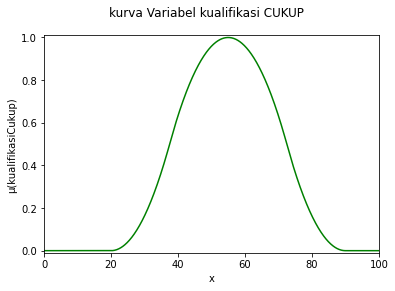

In [122]:
domainkualifikasiCukup()

In [123]:
def domainkualifikasiBaik():
  global x_kualifikasi
  global a_kualifikasiBaik
  global c_kualifikasiBaik
  global b_kualifikasiBaik
  global sbX_kualifikasiBaik
  global sbY_kualifikasiBaik
 
  print("Domain variabel fuzzy besaran kualifikasi Perlamar di himpunan BAIK (batas bawah) : ")
  a_kualifikasiBaik = float(input())
  print("Domain variabel fuzzy besaran kualifikasi Perlamar di himpunan BAIK (batas bawah) : ")
  c_kualifikasiBaik = float(input()) 
  b_kualifikasiBaik = (a_kualifikasiBaik + c_kualifikasiBaik) / 2

  sbX_kualifikasiBaik = []
  sbY_kualifikasiBaik = []

  for i in np.arange(a_kualifikasiBaik, c_kualifikasiBaik + 1, 0.1):

    sbX_kualifikasiBaik.append(i)
    if  i < (b_kualifikasiBaik) and i > a_kualifikasiBaik:
      oordinat = 2* pow(((i- a_kualifikasiBaik)/(c_kualifikasiBaik - a_kualifikasiBaik) ),2)
      sbY_kualifikasiBaik.append(oordinat)

    elif i > (b_kualifikasiBaik) and i < c_kualifikasiBaik: 
      oordinat = 1 - 2* pow(((c_kualifikasiBaik - i) / (c_kualifikasiBaik - a_kualifikasiBaik)),2)
      sbY_kualifikasiBaik.append(oordinat)

    elif i == (b_kualifikasiBaik):
      oordinat = 0.5
      sbY_kualifikasiBaik.append(oordinat)

    elif i <= a_kualifikasiBaik:
      oordinat = 0
      sbY_kualifikasiBaik.append(oordinat)

    elif i >= c_kualifikasiBaik:
      oordinat = 1
      sbY_kualifikasiBaik.append(oordinat)
    i += 1

  sbX_kualifikasiBaik.insert(0, 0)
  sbX_kualifikasiBaik.append(100)

  sbY_kualifikasiBaik.insert(0, 0)
  sbY_kualifikasiBaik.append(1)
  
  plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red') 
  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(kualifikasiBaik)')
  plt.suptitle('kurva Variabel kualifikasi pelamar himpunan BAIK')
  plt.show


Domain variabel fuzzy besaran kualifikasi Perlamar di himpunan BAIK (batas bawah) : 
60
Domain variabel fuzzy besaran kualifikasi Perlamar di himpunan BAIK (batas bawah) : 
100


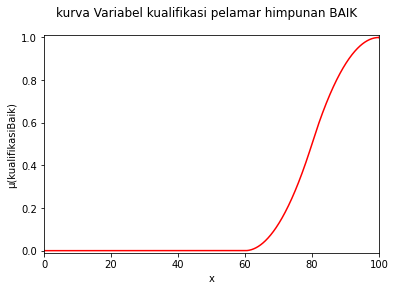

In [124]:
domainkualifikasiBaik()

In [125]:
def kurvaKualifikasi():
  plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
  plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
  plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red')
  
  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(kualifikasiPelamar)')
  plt.suptitle('Kurva gabungan dari tiga himpunan kualifikasi pelamar')
  
  plt.show

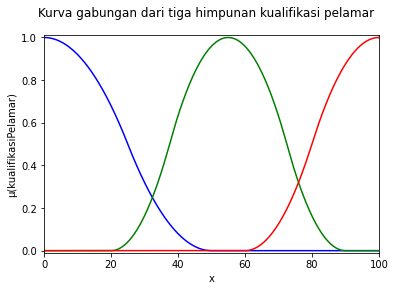

In [126]:
kurvaKualifikasi()

# INFERENSI

**ATURAN (rule):**

1.   [R1] IF nilai tes rendah and IPK rendah and pengalaman kerja sedikit THEN  Klasifikasi Pelamar kurang 

2.   [R2] IF nilai tes rendah and IPK rendah and pengalaman kerja banyak THEN skor Klasifikasi kurang 

3.   [R3] IF nilai tes menengah and IPK rendah and pengalaman kerja sedikit THEN skor Klasifikasi kurang 

4.   [R4] IF nilai tes menengah and IPK rendah and pengalaman kerja banyak THEN skor Klasifikasi cukup 

5.   [R5] IF nilai tes tinggi and IPK rendah and pengalaman kerja sedikit THEN skor Klasifikasi cukup 

6.   [R6] IF nilai tes tinggi and IPK rendah and pengalaman kerja banyak THEN skor Klasifikasi cukup 

7.   [R7] IF nilai tes rendah and IPK tinggi and pengalaman kerja sedikit THEN skor Klasifikasi kurang 

8.   [R8] IF nilai tes rendah and IPK tinggi and pengalaman kerja banyak THEN skor Klasifikasi cukup 

9.   [R9] IF nilai tes menengah and IPK tinggi and pengalaman kerja sedikit THEN skor Klasifikasi baik 

10.  [R10] IF nilai tes menengah and IPK tinggi and pengalaman kerja banyak THEN skor Klasifikasi baik 

11.  [R11] IF nilai tes tinggi and IPK tinggi and pengalaman kerja sedikit THEN skor Klasifikasi baik 

12.  [R12] IF nilai tes tinggi and IPK tinggi and pengalaman kerja banyak THEN skor Klasifikasi baik 









In [127]:
print("μNilaiRENDAH : {μNilaiRENDAH}\nμNilaiMENENGAH : {μNilaiMENENGAH}\nμNilaiTINGGI : {μNilaiTINGGI}".format(μNilaiRENDAH = μNilaiRENDAH, μNilaiMENENGAH = μNilaiMENENGAH, μNilaiTINGGI = μNilaiTINGGI))

μNilaiRENDAH : 0
μNilaiMENENGAH : 0.4355555555555556
μNilaiTINGGI : 0.32000000000000006


In [128]:
print("μipkRendah : {μipkRendah}\nμipkTinggi: {μipkTinggi}".format(μipkRendah = μipkRendah, μipkTinggi = μipkTinggi))

μipkRendah : 0.18
μipkTinggi: 0.26888888888888896


In [129]:
print("μpengalamanSedikit : {μpengalamanSedikit}\nμpengalamanBanyak : {μpengalamanBanyak}".format(μpengalamanSedikit = μpengalamanSedikit, μpengalamanBanyak = μpengalamanBanyak))

μpengalamanSedikit : 0.07692307692307693
μpengalamanBanyak : 0.25


In [130]:
def alphapredicatekurang1():
  global apredicateKurang
  global clipkualifikasiKurang1
  #[R1] IF nilai tes rendah and IPK rendah and pengalaman kerja sedikit THEN Klasifikasi Pelamar kurang
  alphapredicatekurang1 = min(μNilaiRENDAH, μipkRendah, μpengalamanSedikit )
  apredicateKurang = []
  apredicateKurang.append(alphapredicatekurang1)
  print("Untuk nilai a-predicate : {ap} maka luas area pada variabel output sbg berikut :".format(ap = alphapredicatekurang1))
  plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
  plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
  plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red')

  clipkualifikasiKurang1 = []
  for x in range(len(sbY_kualifikasiKurang)):
    if sbY_kualifikasiKurang[x] > alphapredicatekurang1:
      clipkualifikasiKurang1.append(alphapredicatekurang1)

    elif sbY_kualifikasiKurang[x] <= alphapredicatekurang1:
      clipkualifikasiKurang1.append(sbY_kualifikasiKurang[x])
    x+=1 



  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(skor)')
  plt.suptitle('Kurva inferensi kualifikasi Kurang')

  plt.fill_between(sbX_kualifikasiKurang, clipkualifikasiKurang1, color = "yellow")
  plt.show
  return alphapredicatekurang1

Untuk nilai a-predicate : 0 maka luas area pada variabel output sbg berikut :


0

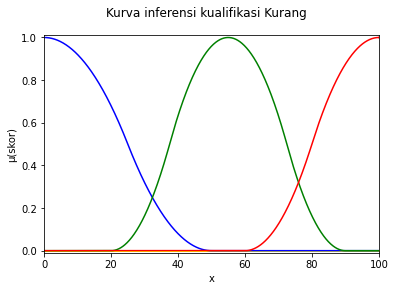

In [131]:
alphapredicatekurang1()

In [132]:
def alphapredicatekurang2():
  global clipkualifikasiKurang2
  #[R2] IF nilai tes rendah and IPK rendah and pengalaman kerja banyak THEN skor Klasifikasi kurang
  alphapredicatekurang2 = min(μNilaiRENDAH, μipkRendah, μpengalamanBanyak )
  apredicateKurang.append(alphapredicatekurang2)
  print("Untuk nilai a-predicate : {ap} maka luas area pada variabel output sbg berikut :".format(ap = alphapredicatekurang2))
  plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
  plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
  plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red')

  clipkualifikasiKurang2 = []
  for x in range(len(sbY_kualifikasiKurang)):
    if sbY_kualifikasiKurang[x] > alphapredicatekurang2:
      clipkualifikasiKurang2.append(alphapredicatekurang2)

    elif sbY_kualifikasiKurang[x] <= alphapredicatekurang2:
      clipkualifikasiKurang2.append(sbY_kualifikasiKurang[x])
    x+=1 

  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(skor)')
  plt.suptitle('Kurva inferensi kualifikasi Kurang')

  plt.fill_between(sbX_kualifikasiKurang, clipkualifikasiKurang2, color = "yellow")
  plt.show
  return alphapredicatekurang2

Untuk nilai a-predicate : 0 maka luas area pada variabel output sbg berikut :


0

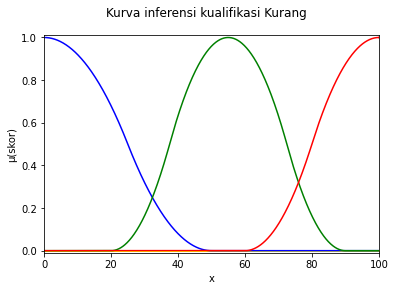

In [133]:
alphapredicatekurang2()

In [134]:
def alphapredicatekurang3():
  global clipkualifikasiKurang3
  #[R3] IF nilai tes menengah and IPK rendah and pengalaman kerja sedikit THEN skor Klasifikasi kurang
  alphapredicatekurang3 = min(μNilaiMENENGAH , μipkRendah, μpengalamanSedikit )
  apredicateKurang.append(alphapredicatekurang3)
  print("Untuk nilai a-predicate : {ap} maka luas area pada variabel output sbg berikut :".format(ap = alphapredicatekurang3))
  plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
  plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
  plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red')

  clipkualifikasiKurang3 = []
  for x in range(len(sbY_kualifikasiKurang)):
    if sbY_kualifikasiKurang[x] > alphapredicatekurang3:
      clipkualifikasiKurang3.append(alphapredicatekurang3)

    elif sbY_kualifikasiKurang[x] <= alphapredicatekurang3:
      clipkualifikasiKurang3.append(sbY_kualifikasiKurang[x])
    x+=1 

  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(skor)')
  plt.suptitle('Kurva inferensi kualifikasi Kurang')

  plt.fill_between(sbX_kualifikasiKurang, clipkualifikasiKurang3, color = "yellow")
  plt.show

  return alphapredicatekurang3

Untuk nilai a-predicate : 0.07692307692307693 maka luas area pada variabel output sbg berikut :


0.07692307692307693

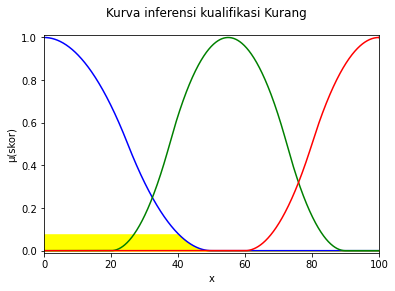

In [135]:
alphapredicatekurang3()

In [136]:
def alphapredicatecukup1():
  global clipkualifikasiCukup1
  global apredicateCukup
  #[R4] IF nilai tes menengah and IPK rendah and pengalaman kerja banyak THEN skor Klasifikasi cukup
  alphapredicatecukup1 = min(μNilaiMENENGAH, μipkRendah, μpengalamanBanyak)
  print("Untuk nilai a-predicate : {ap} maka luas area pada variabel output sbg berikut :".format(ap = alphapredicatecukup1))
  apredicateCukup = []
  apredicateCukup.append(alphapredicatecukup1)
  plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
  plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
  plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red')

  clipkualifikasiCukup1 = []
  for x in range(len(sbY_kualifikasiCukup)):
    if sbY_kualifikasiCukup[x] > alphapredicatecukup1:
      clipkualifikasiCukup1.append(alphapredicatecukup1)

    elif sbY_kualifikasiCukup[x] <= alphapredicatecukup1:
      clipkualifikasiCukup1.append(sbY_kualifikasiCukup[x])
    x+=1 

  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(skor)')
  plt.suptitle('Kurva inferensi kualifikasi cukup')

  plt.fill_between(sbX_kualifikasiCukup, clipkualifikasiCukup1, color = "yellow")
  plt.show
  return alphapredicatecukup1


Untuk nilai a-predicate : 0.18 maka luas area pada variabel output sbg berikut :


0.18

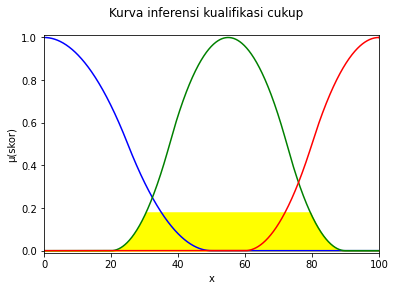

In [137]:
alphapredicatecukup1()

In [138]:
def alphapredicatecukup2():
  global clipkualifikasiCukup2
  #[R5] IF nilai tes tinggi and IPK rendah and pengalaman kerja sedikit THEN skor Klasifikasi cukup
  alphapredicatecukup2 = min(μNilaiTINGGI, μipkRendah, μpengalamanSedikit)
  print("Untuk nilai a-predicate : {ap} maka luas area pada variabel output sbg berikut :".format(ap = alphapredicatecukup2))
  apredicateCukup.append(alphapredicatecukup2)

  plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
  plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
  plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red')

  clipkualifikasiCukup2 = []
  for x in range(len(sbY_kualifikasiCukup)):
    if sbY_kualifikasiCukup[x] > alphapredicatecukup2:
      clipkualifikasiCukup2.append(alphapredicatecukup2)

    elif sbY_kualifikasiCukup[x] <= alphapredicatecukup2:
      clipkualifikasiCukup2.append(sbY_kualifikasiCukup[x])
    x+=1 



  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(skor)')
  plt.suptitle('Kurva inferensi kualifikasi CUKUP')

  plt.fill_between(sbX_kualifikasiCukup, clipkualifikasiCukup2, color = "yellow")
  plt.show
  return alphapredicatecukup2

Untuk nilai a-predicate : 0.07692307692307693 maka luas area pada variabel output sbg berikut :


0.07692307692307693

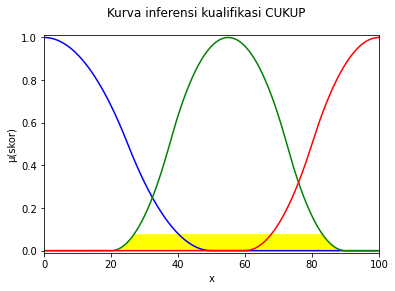

In [139]:
alphapredicatecukup2()

In [140]:
def alphapredicatecukup3():
  global clipkualifikasiCukup3
  #[R6] IF nilai tes tinggi and IPK rendah and pengalaman kerja banyak THEN skor Klasifikasi cukup
  alphapredicatecukup3 = min(μNilaiTINGGI, μipkRendah, μpengalamanBanyak)
  print("Untuk nilai a-predicate : {ap} maka luas area pada variabel output sbg berikut :".format(ap = alphapredicatecukup3))
  apredicateCukup.append(alphapredicatecukup3)

  plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
  plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
  plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red')

  clipkualifikasiCukup3 = []
  for x in range(len(sbY_kualifikasiCukup)):
    if sbY_kualifikasiCukup[x] > alphapredicatecukup3:
      clipkualifikasiCukup3.append(alphapredicatecukup3)

    elif sbY_kualifikasiCukup[x] <= alphapredicatecukup3:
      clipkualifikasiCukup3.append(sbY_kualifikasiCukup[x])
    x+=1 



  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(skor)')
  plt.suptitle('Kurva inferensi kualifikasi CUKUP')

  plt.fill_between(sbX_kualifikasiCukup, clipkualifikasiCukup3, color = "yellow")
  plt.show
  return alphapredicatecukup3

Untuk nilai a-predicate : 0.18 maka luas area pada variabel output sbg berikut :


0.18

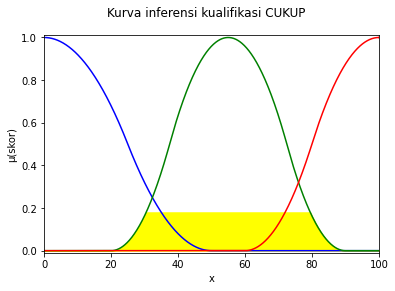

In [141]:
alphapredicatecukup3()

In [142]:
def alphapredicatekurang4():
  global clipkualifikasiKurang4
  #[R7] IF nilai tes rendah and IPK tinggi and pengalaman kerja sedikit THEN skor Klasifikasi kurang
  alphapredicatekurang4 = min(μNilaiRENDAH, μipkTinggi, μpengalamanSedikit)
  print("Untuk nilai a-predicate : {ap} maka luas area pada variabel output sbg berikut :".format(ap = alphapredicatekurang4))
  apredicateKurang.append(alphapredicatekurang4)

  plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
  plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
  plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red')

  clipkualifikasiKurang4 = []
  for x in range(len(sbY_kualifikasiKurang)):
    if sbY_kualifikasiKurang[x] > alphapredicatekurang4:
      clipkualifikasiKurang4.append(alphapredicatekurang4)

    elif sbY_kualifikasiKurang[x] <= alphapredicatekurang4:
      clipkualifikasiKurang4.append(sbY_kualifikasiKurang[x])
    x+=1 



  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(skor)')
  plt.suptitle('Kurva inferensi kualifikasi Kurang')

  plt.fill_between(sbX_kualifikasiKurang, clipkualifikasiKurang4, color = "yellow")
  plt.show
  return alphapredicatekurang4

Untuk nilai a-predicate : 0 maka luas area pada variabel output sbg berikut :


0

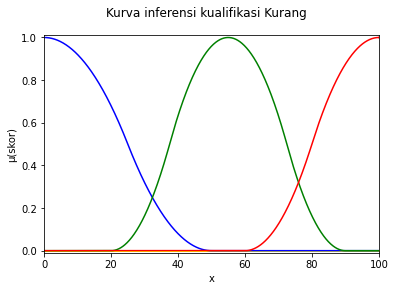

In [143]:
alphapredicatekurang4()

In [144]:
def alphapredicatecukup4():
  global clipkualifikasiCukup4
  #[R8] IF nilai tes rendah and IPK tinggi and pengalaman kerja banyak THEN skor Klasifikasi cukup
  alphapredicatecukup4 = min(μNilaiRENDAH, μipkTinggi, μpengalamanBanyak)
  print("Untuk nilai a-predicate : {ap} maka luas area pada variabel output sbg berikut :".format(ap = alphapredicatecukup4))
  apredicateCukup.append(alphapredicatecukup4)

  plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
  plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
  plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red')

  clipkualifikasiCukup4 = []
  for x in range(len(sbY_kualifikasiCukup)):
    if sbY_kualifikasiCukup[x] > alphapredicatecukup4:
      clipkualifikasiCukup4.append(alphapredicatecukup4)

    elif sbY_kualifikasiCukup[x] <= alphapredicatecukup4:
      clipkualifikasiCukup4.append(sbY_kualifikasiCukup[x])
    x+=1 

  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(skor)')
  plt.suptitle('Kurva inferensi kualifikasi CUKUP')

  plt.fill_between(sbX_kualifikasiCukup, clipkualifikasiCukup4, color = "yellow")
  plt.show
  return alphapredicatecukup4

Untuk nilai a-predicate : 0 maka luas area pada variabel output sbg berikut :


0

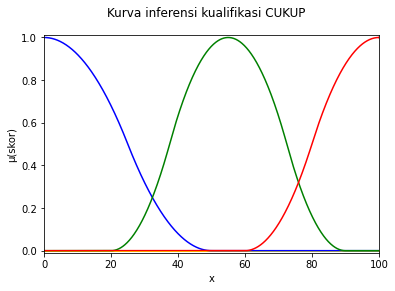

In [145]:
alphapredicatecukup4()

In [146]:
def alphapredicatebaik1():
  #[R9] IF nilai tes menengah and IPK tinggi and pengalaman kerja sedikit THEN skor Klasifikasi baik
  global clipkualifikasiBaik1
  global apredicateBaik
  alphapredicatebaik1 = min(μNilaiMENENGAH, μipkTinggi, μpengalamanSedikit)
  print("Untuk nilai a-predicate : {ap} maka luas area pada variabel output sbg berikut :".format(ap = alphapredicatebaik1))
  apredicateBaik = []
  apredicateBaik.append(alphapredicatebaik1)

  plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
  plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
  plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red')

  clipkualifikasiBaik1 = []
  for x in range(len(sbY_kualifikasiBaik)):
    if sbY_kualifikasiBaik[x] > alphapredicatebaik1:
      clipkualifikasiBaik1.append(alphapredicatebaik1)

    elif sbY_kualifikasiBaik[x] <= alphapredicatebaik1:
      clipkualifikasiBaik1.append(sbY_kualifikasiBaik[x])
    x+=1 

  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(skor)')
  plt.suptitle('Kurva inferensi kualifikasi Baik')

  plt.fill_between(sbX_kualifikasiBaik, clipkualifikasiBaik1, color = "yellow")
  plt.show
  return alphapredicatebaik1

Untuk nilai a-predicate : 0.07692307692307693 maka luas area pada variabel output sbg berikut :


0.07692307692307693

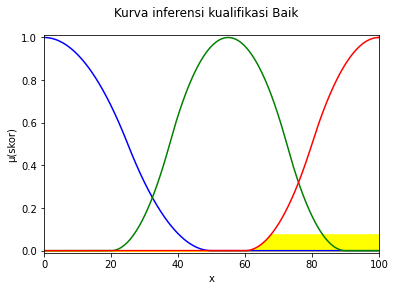

In [147]:
alphapredicatebaik1()

In [148]:
def alphapredicatebaik2():
  global clipkualifikasiBaik2
  #[R10] IF nilai tes menengah and IPK tinggi and pengalaman kerja banyak THEN skor Klasifikasi baik
  alphapredicatebaik2 = min(μNilaiMENENGAH, μipkTinggi, μpengalamanBanyak)
  print("Untuk nilai a-predicate : {ap} maka luas area pada variabel output sbg berikut :".format(ap = alphapredicatebaik2))
  apredicateBaik.append(alphapredicatebaik2)

  plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
  plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
  plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red')

  clipkualifikasiBaik2 = []
  for x in range(len(sbY_kualifikasiBaik)):
    if sbY_kualifikasiBaik[x] > alphapredicatebaik2:
      clipkualifikasiBaik2.append(alphapredicatebaik2)

    elif sbY_kualifikasiBaik[x] <= alphapredicatebaik2:
      clipkualifikasiBaik2.append(sbY_kualifikasiBaik[x])
    x+=1 

  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(skor)')
  plt.suptitle('Kurva inferensi kualifikasi Baik')

  plt.fill_between(sbX_kualifikasiBaik, clipkualifikasiBaik2, color = "yellow")
  plt.show
  return alphapredicatebaik2

Untuk nilai a-predicate : 0.25 maka luas area pada variabel output sbg berikut :


0.25

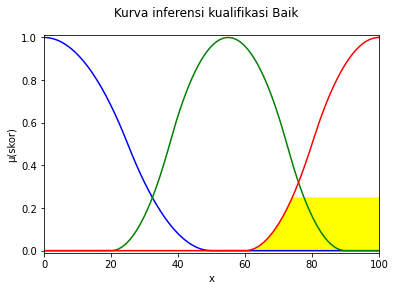

In [149]:
alphapredicatebaik2()

In [150]:
def alphapredicatebaik3():
  global clipkualifikasiBaik3
  #[R11] IF nilai tes tinggi and IPK tinggi and pengalaman kerja sedikit THEN skor Klasifikasi baik
  alphapredicatebaik3 = min(μNilaiTINGGI, μipkTinggi , μpengalamanSedikit)
  print("Untuk nilai a-predicate : {ap} maka luas area pada variabel output sbg berikut :".format(ap = alphapredicatebaik3))
  apredicateBaik.append(alphapredicatebaik3)

  plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
  plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
  plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red')

  clipkualifikasiBaik3 = []
  for x in range(len(sbY_kualifikasiBaik)):
    if sbY_kualifikasiBaik[x] > alphapredicatebaik3:
      clipkualifikasiBaik3.append(alphapredicatebaik3)

    elif sbY_kualifikasiBaik[x] <= alphapredicatebaik3:
      clipkualifikasiBaik3.append(sbY_kualifikasiBaik[x])
    x+=1 

  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(skor)')
  plt.suptitle('Kurva inferensi kualifikasi Baik')

  plt.fill_between(sbX_kualifikasiBaik, clipkualifikasiBaik3, color = "yellow")
  plt.show
  return alphapredicatebaik3

Untuk nilai a-predicate : 0.07692307692307693 maka luas area pada variabel output sbg berikut :


0.07692307692307693

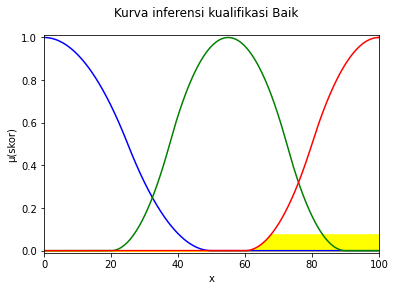

In [151]:
alphapredicatebaik3()

In [152]:
def alphapredicatebaik4():
  global clipkualifikasiBaik4
  #[R12] IF nilai tes tinggi and IPK tinggi and pengalaman kerja banyak THEN skor Klasifikasi baik
  alphapredicatebaik4 = min(μNilaiTINGGI, μipkTinggi, μpengalamanBanyak)
  print("Untuk nilai a-predicate : {ap} maka luas area pada variabel output sbg berikut :".format(ap = alphapredicatebaik4))
  apredicateBaik.append(alphapredicatebaik4)

  plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
  plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
  plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red')

  clipkualifikasiBaik4 = []
  for x in range(len(sbY_kualifikasiBaik)):
    if sbY_kualifikasiBaik[x] > alphapredicatebaik4:
      clipkualifikasiBaik4.append(alphapredicatebaik4)

    elif sbY_kualifikasiBaik[x] <= alphapredicatebaik4:
      clipkualifikasiBaik4.append(sbY_kualifikasiBaik[x])
    x+=1 

  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(skor)')
  plt.suptitle('Kurva inferensi kualifikasi Baik')

  plt.fill_between(sbX_kualifikasiBaik, clipkualifikasiBaik4, color = "yellow")
  plt.show
  return alphapredicatebaik4


Untuk nilai a-predicate : 0.25 maka luas area pada variabel output sbg berikut :


0.25

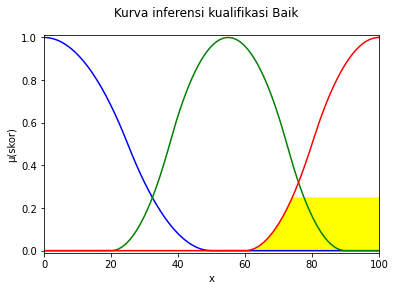

In [153]:
alphapredicatebaik4()

In [154]:
def defMAXapredicateKURANG():
  global MAXapredicateKURANG
  print("==Melakukan komposisi aturan dengan fungsi MAX dari a predikat di tiap himpunan variable output==\n")

  print("Komposisi aturan fungsi MAX yang akan dipakai")

  defalphapredicatekurang = [alphapredicatekurang1(), alphapredicatekurang2(), alphapredicatekurang3(), alphapredicatekurang4()]
  for z in range(len(apredicateKurang)):
    if apredicateKurang[z] == max(apredicateKurang):
      MAXapredicateKURANG = apredicateKurang[z] # ini var penting nanti dipake lagi
      defalphapredicatekurang[z]
    z += 1
  print("\nalpha predicate max dari himpunan Kurang : {max}".format(max = MAXapredicateKURANG))

==Melakukan komposisi aturan dengan fungsi MAX dari a predikat di tiap himpunan variable output==

Komposisi aturan fungsi MAX yang akan dipakai
Untuk nilai a-predicate : 0 maka luas area pada variabel output sbg berikut :
Untuk nilai a-predicate : 0 maka luas area pada variabel output sbg berikut :
Untuk nilai a-predicate : 0.07692307692307693 maka luas area pada variabel output sbg berikut :
Untuk nilai a-predicate : 0 maka luas area pada variabel output sbg berikut :

alpha predicate max dari himpunan Kurang : 0.07692307692307693


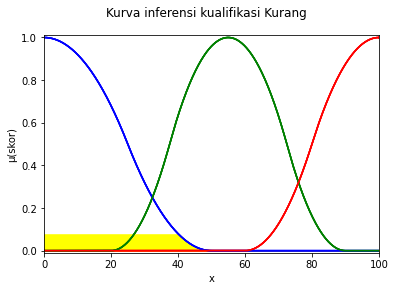

In [155]:
defMAXapredicateKURANG()

In [156]:
def defMAXapredicateCUKUP():
  global MAXapredicateCUKUP
  print("\nKomposisi aturan fungsi MAX yang akan dipakai")

  defalphapredicatecukup= [alphapredicatecukup1(), alphapredicatecukup2(), alphapredicatecukup3(), alphapredicatecukup4()]
  for z in range(len(apredicateCukup)):
    if apredicateCukup[z] == max(apredicateCukup):
      MAXapredicateCUKUP = apredicateCukup[z] # ini var penting nanti dipake lagi
      defalphapredicatecukup[z]
    z += 1
  print("\nalpha predicate max dari himpunan Cukup : {max}".format(max = MAXapredicateCUKUP))


Komposisi aturan fungsi MAX yang akan dipakai
Untuk nilai a-predicate : 0.18 maka luas area pada variabel output sbg berikut :
Untuk nilai a-predicate : 0.07692307692307693 maka luas area pada variabel output sbg berikut :
Untuk nilai a-predicate : 0.18 maka luas area pada variabel output sbg berikut :
Untuk nilai a-predicate : 0 maka luas area pada variabel output sbg berikut :

alpha predicate max dari himpunan Cukup : 0.18


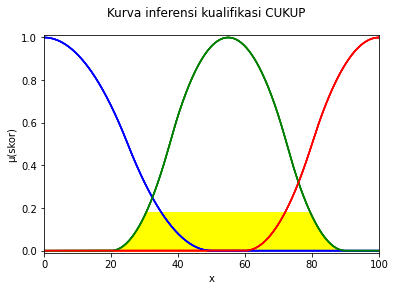

In [157]:
defMAXapredicateCUKUP()

In [158]:
def defMAXapredicateBAIK():
  global MAXapredicateBAIK
  print("\nKomposisi aturan fungsi MAX yang akan dipakai")

  defalphapredicatebaik= [alphapredicatebaik1(), alphapredicatebaik2(), alphapredicatebaik3(), alphapredicatebaik4()]
  for z in range(len(apredicateBaik)):
    if apredicateBaik[z] == max(apredicateBaik):
      MAXapredicateBAIK = apredicateBaik[z] # ini var penting nanti dipake lagi
      defalphapredicatebaik[z]
    z += 1
  print("\nalpha predicate max dari himpunan baik : {max}".format(max = MAXapredicateBAIK))



Komposisi aturan fungsi MAX yang akan dipakai
Untuk nilai a-predicate : 0.07692307692307693 maka luas area pada variabel output sbg berikut :
Untuk nilai a-predicate : 0.25 maka luas area pada variabel output sbg berikut :
Untuk nilai a-predicate : 0.07692307692307693 maka luas area pada variabel output sbg berikut :
Untuk nilai a-predicate : 0.25 maka luas area pada variabel output sbg berikut :

alpha predicate max dari himpunan baik : 0.25


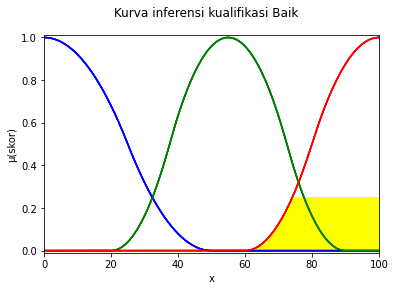

In [159]:
defMAXapredicateBAIK()

Gabungkan grafik keanggotaan yang tertinggi dari setiap variabel linguistik

In [167]:
def kurvaKualifikasiGabung():
  global clipMAXKurang
  global clipMAXCukup
  global clipMAXBaik
  plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
  plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
  plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red')

  
  clipMAXKurang = []
  
  for x in range(len(sbY_kualifikasiKurang)):
    if sbY_kualifikasiKurang[x] > MAXapredicateKURANG:
      clipMAXKurang.append(MAXapredicateKURANG)

    elif sbY_kualifikasiKurang[x] <= MAXapredicateKURANG:
      clipMAXKurang.append(sbY_kualifikasiKurang[x])
    x+=1 


  clipMAXCukup = []

  for y in range(len(sbY_kualifikasiCukup)):
    if sbY_kualifikasiCukup[y] > MAXapredicateCUKUP:
      clipMAXCukup.append(MAXapredicateCUKUP)

    elif sbY_kualifikasiCukup[y] <= MAXapredicateCUKUP:
      clipMAXCukup.append(sbY_kualifikasiCukup[y])
    x+=1 

  clipMAXBaik = []

  for y in range(len(sbY_kualifikasiBaik)):
    if sbY_kualifikasiBaik[y] > MAXapredicateBAIK:
      clipMAXBaik.append(MAXapredicateBAIK)

    elif sbY_kualifikasiBaik[y] <= MAXapredicateBAIK:
      clipMAXBaik.append(sbY_kualifikasiBaik[y])
    x+=1 

  plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(kualifikasiPelamar)')
  plt.fill_between(sbX_kualifikasiKurang, clipMAXKurang, color = "yellow")
  plt.fill_between(sbX_kualifikasiCukup, clipMAXCukup, color = "yellow")
  plt.fill_between(sbX_kualifikasiBaik, clipMAXBaik, color = "yellow")
  plt.suptitle('Kurva gabungan dari tiga himpunan kualifikasi pelamar clipping')
  
  plt.show

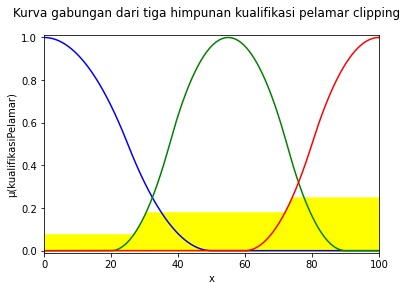

In [168]:
kurvaKualifikasiGabung()

# DEFUZZYFIKASI

**Metode Centroid**

Menentukan Nilai crisp z dengan membagi daerah menjadi 4 bagian d1,d2, d3, dan d4. luas masing masing :a1, a2, a3, dan A4. Momen terhadap nilai keanggotaan masing-masing 
adalah: m1, m2, m3 dan m4

In [1]:
print(MAXapredicateKURANG)
print(MAXapredicateCUKUP)
print(MAXapredicateBAIK)

NameError: ignored

   2
1 x - 40 x + 352.9
koef a =1
koef b =-40
koef c =352.9
26.862943974709395
13.137056025290603
   2
1 x - 40 x + 289.8
koef a =1
koef b =-40
koef c =289.8
30.497618777608565
13.137056025290603
   2
1 x - 120 x + 3456
koef a =1
koef b =-120
koef c =3456
72.0
48.0
   2
1 x - 120 x + 3400
koef a =1
koef b =-120
koef c =3400
74.14213562373095
45.85786437626905


<function matplotlib.pyplot.show(*args, **kw)>

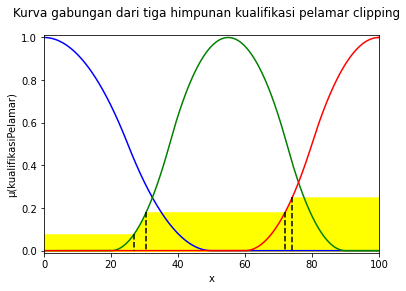

In [211]:
if MAXapredicateKURANG <= MAXapredicateCUKUP <= MAXapredicateBAIK: 

  c_kuad1 = ((MAXapredicateKURANG * pow(c_kualifikasiCukup - a_kualifikasiCukup, 2)) / 2) - pow(a_kualifikasiCukup,2)
  pers1 = np.poly1d([1,-2*a_kualifikasiCukup,-c_kuad1])
  print(pers1)
  a = float(input("koef a ="))
  b = float(input("koef b ="))
  c = float(input("koef c ="))
  d = pow(b,2) - 4 * a * c
  if d > 0:
    t11 = (-b + sqrt(d)) /  (2*a)
    t12 = (-b - sqrt(d)) /  (2*a)  
    print(t11)
    print(t12)
  elif d== 0:
    t11 = -b / (2 - a)
    print(t11)
  else:
    print("no root")
  
  c_kuad2 = ((MAXapredicateCUKUP * pow(c_kualifikasiCukup - a_kualifikasiCukup, 2)) / 2) - pow(a_kualifikasiCukup,2)
  pers2 = np.poly1d([1,-2*a_kualifikasiCukup,-c_kuad2])
  print(pers2)
  a = float(input("koef a ="))
  b = float(input("koef b ="))
  c = float(input("koef c ="))
  d = pow(b,2) - 4 * a * c
  if d > 0:
    t21 = (-b + sqrt(d)) /  (2*a)
    t22 = (-b - sqrt(d)) /  (2*a)  
    print(t21)
    print(t12)
  elif d== 0:
    t21 = -b / (2 - a)
    print(t21)
  else:
    print("no root")

  c_kuad3 = ((MAXapredicateCUKUP * pow(c_kualifikasiBaik - a_kualifikasiBaik, 2)) / 2) - pow(a_kualifikasiBaik,2)
  pers3 = np.poly1d([1,-2*a_kualifikasiBaik,-c_kuad3])
  print(pers3)
  a = float(input("koef a ="))
  b = float(input("koef b ="))
  c = float(input("koef c ="))
  d = pow(b,2) - 4 * a * c
  if d > 0:
    t31 = (-b + sqrt(d)) /  (2*a)
    t32 = (-b - sqrt(d)) /  (2*a)  
    print(t31)
    print(t32)
  elif d== 0:
    t31 = -b / (2 - a)
    print(t31)
  else:
    print("no root")

  c_kuad4 = ((MAXapredicateBAIK * pow(c_kualifikasiBaik - a_kualifikasiBaik, 2)) / 2) - pow(a_kualifikasiBaik,2)
  pers4 = np.poly1d([1,-2*a_kualifikasiBaik,-c_kuad4])
  print(pers4)
  a = float(input("koef a ="))
  b = float(input("koef b ="))
  c = float(input("koef c ="))
  d = pow(b,2) - 4 * a * c
  if d > 0:
    t41 = (-b + sqrt(d)) /  (2*a)
    t42 = (-b - sqrt(d)) /  (2*a)  
    print(t41)
    print(t42)
  elif d== 0:
    t41 = -b / (2 - a)
    print(t31)
  else:
    print("no root")

    
plt.plot(sbX_kualifikasiKurang,sbY_kualifikasiKurang, color = 'blue') 
plt.plot(sbX_kualifikasiCukup,sbY_kualifikasiCukup, color = 'green') 
plt.plot(sbX_kualifikasiBaik,sbY_kualifikasiBaik, color = 'red')
plt.plot([t11,t11],[MAXapredicateKURANG,0], 'k--') 
plt.plot([t21,t21],[MAXapredicateCUKUP,0], 'k--') 
plt.plot([t31,t31],[MAXapredicateCUKUP,0], 'k--') 
plt.plot([t41,t41],[MAXapredicateBAIK,0], 'k--') 

plt.axis([bbSemestaKualifikasi, baSemestaKualifikasi, -0.01 ,1.01])
plt.xlabel('x')
plt.ylabel('μ(kualifikasiPelamar)')
plt.fill_between(sbX_kualifikasiKurang, clipMAXKurang, color = "yellow")
plt.fill_between(sbX_kualifikasiCukup, clipMAXCukup, color = "yellow")
plt.fill_between(sbX_kualifikasiBaik, clipMAXBaik, color = "yellow")
plt.suptitle('Kurva gabungan dari tiga himpunan kualifikasi pelamar clipping')

plt.show